In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('voice.csv')

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

In [5]:
df.isnull().sum().any()

False

In [6]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [7]:
df['label'] = df['label'].map({'male':1, 'female':0})

In [8]:
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [10]:
Y = df['label']
X = df.drop('label', axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [13]:
scaled_data = scaler.transform(X)

In [14]:
pca = PCA(n_components=2)

In [15]:
pca.fit(scaled_data)

PCA(n_components=2)

In [16]:
x_pca = pca.transform(scaled_data)

In [17]:
x_pca.shape

(3168, 2)

Text(0, 0.5, 'Second Principal Component')

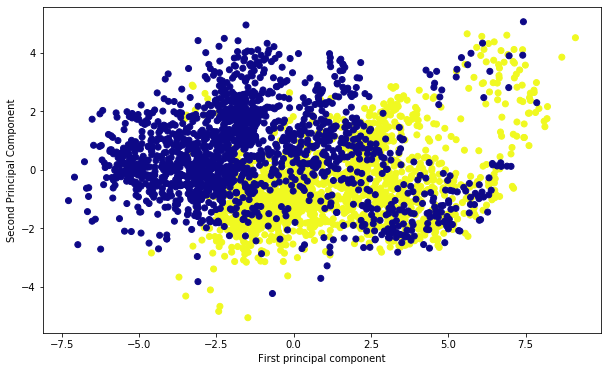

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['label'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [20]:
pca.components_

array([[-0.31336136,  0.27977246, -0.27930171, -0.30339858, -0.18852307,
         0.24104888,  0.13079792,  0.13187105,  0.22261647,  0.27442864,
        -0.24312987, -0.31336136, -0.18770729, -0.15814609, -0.11054344,
        -0.22603264, -0.08893811, -0.22917517, -0.22764859,  0.08568381],
       [ 0.03471729, -0.2027186 ,  0.00794913,  0.1557747 , -0.18819448,
        -0.28122933,  0.30577622,  0.24836733, -0.35677772, -0.23211292,
        -0.11207328,  0.03471729,  0.12854894, -0.06307889, -0.25000822,
        -0.26905751,  0.30483061, -0.30872834, -0.314308  ,  0.16223965]])

In [21]:
logistic = LogisticRegression()

In [22]:
df1 = pd.DataFrame(x_pca)

In [24]:
df1.shape

(3168, 2)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df1, Y, test_size=0.2, random_state=5)

In [29]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = logistic.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[243,  71],
       [ 41, 279]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score, classification_report

In [33]:
accuracy_score(y_test, y_pred)

0.8233438485804416

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       314
           1       0.80      0.87      0.83       320

    accuracy                           0.82       634
   macro avg       0.83      0.82      0.82       634
weighted avg       0.83      0.82      0.82       634

